Testing out a new inter and intra-night metrics:

compute the median gap between observations within a night (only including nights that have multiple observations).
And the median gap between the last observation in a night and the first observation in the next night.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plotters

In [11]:
runs = {'ops2_1098':'Pairs','ops2_1093':'No Pairs'}

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter = "r"
Found 535139 visits
Running:  ['opsim_Median_Intra-Night_Gap_Pairs_dithered_HEAL', 'opsim_Median_Inter-Night_Gap_dithered_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 1499 bins, returning 200
Optimal bin calculation tried to make 25186 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter = "r"
Found 544066 visits
Running:  ['opsim_Median_Inter-Night_Gap_dithered_HEAL', 'opsim_Median_Intra-Night_Gap_No_Pairs_dithered_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 23190 bins, returning 200
Optimal bin calculation tried to make 2413 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" sqlconstraint now.
Plotting complete.


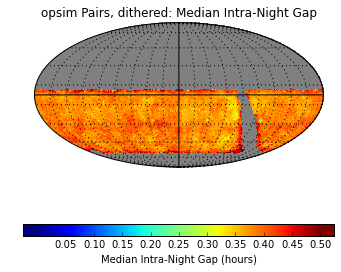

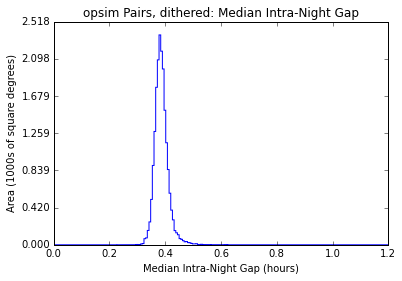

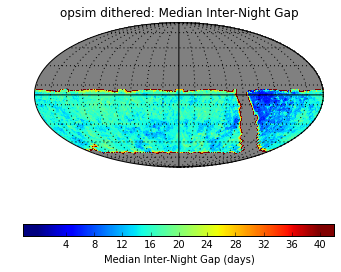

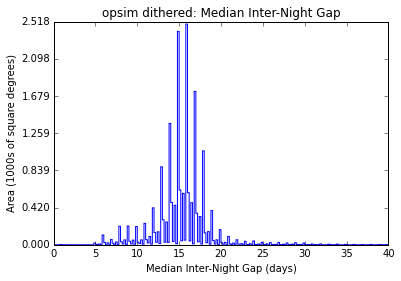

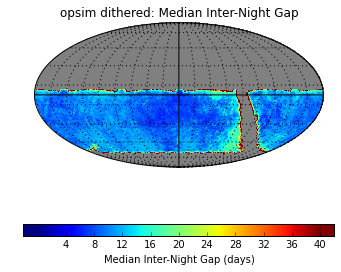

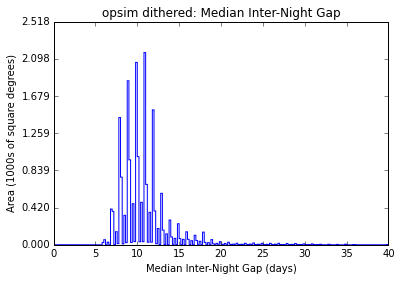

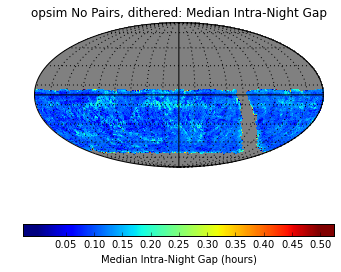

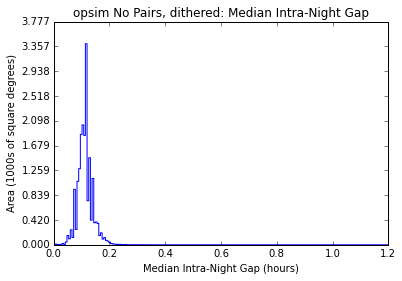

In [15]:
for runName in runs:
    # Set up the database connection
    opsdb = db.OpsimDatabase(runName+'_sqlite.db')
    md = runs[runName]
    outDir = 'intraDay'
    resultsDb = db.ResultsDb(outDir=outDir)
    plotList = [plotters.HealpixSkyMap(), plotters.HealpixHistogram()]
    slicer=slicers.HealpixSlicer()
    metric = metrics.IntraNightGapsMetric()
    metric2 = metrics.InterNightGapsMetric()
    plotDict = {'cmap':'jet', 'colorMin':0,'colorMax':0.5, 'xMin':0,'xMax':1.2}
    plotDict2 = {'cmap':'jet', 'colorMin':0,'colorMax':40, 'xMin':0,'xMax':40}
    sql = 'filter = "r"'
    bundleList = []
    #bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
                                                 #plotFuncs=plotList, metadata=md))
    #bundleList.append(metricBundles.MetricBundle(metric2,slicer,sql, plotDict=plotDict2, plotFuncs=plotList))

    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, metadata=md+', dithered', plotFuncs=plotList))
    bundleList.append(metricBundles.MetricBundle(metric2,slicer,sql, plotDict=plotDict2, metadata=md+', dithered', plotFuncs=plotList))

    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter = "r"
Found 544710 visits
Running:  ['opsim_Median_Inter-Night_Gap_dithered_HEAL', 'opsim_Median_Intra-Night_Gap_dithered_HEAL']
Completed metric generation.
Running:  ['opsim_Median_Inter-Night_Gap_r_HEAL', 'opsim_Median_Intra-Night_Gap_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "r"' should be explicitly declared as text('filter = "r"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Optimal bin calculation tried to make 16926 bins, returning 200
Optimal bin calculation tried to make 2463 bins, returning 200
Optimal bin calculation tried to make 241 bins, returning 200



Plotting figures with filter = "r" sqlconstraint now.
Plotting complete.


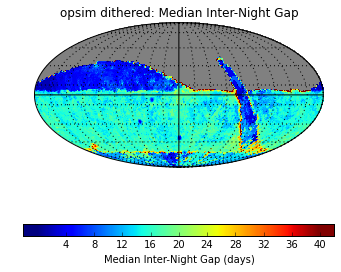

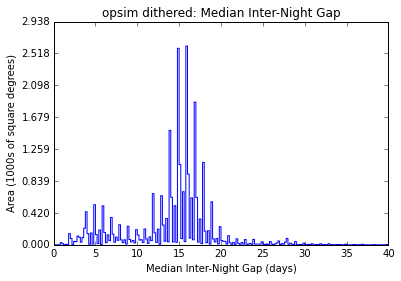

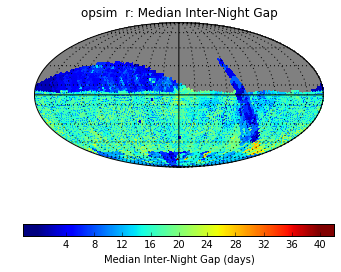

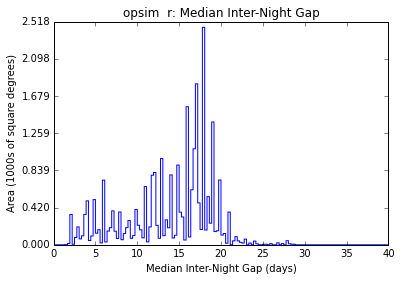

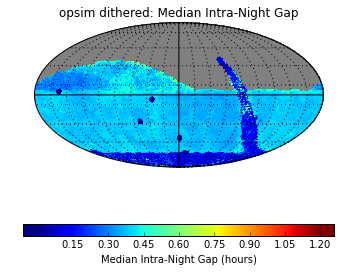

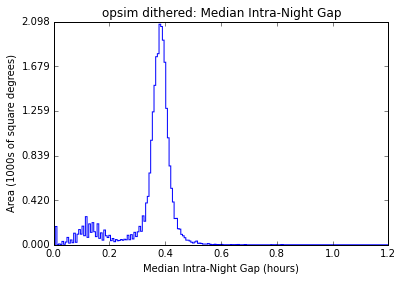

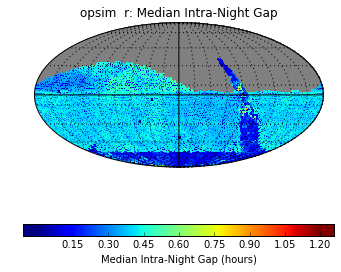

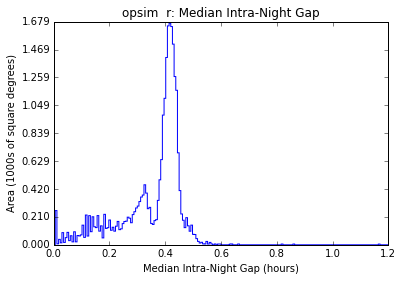

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter = "r"
Found 544710 visits
Running:  ['opsim_Max_nightly_gap_dithered_HEAL']
Completed metric generation.
Running:  ['opsim_Max_nightly_gap_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" sqlconstraint now.
Plotting complete.


Optimal bin calculation tried to make 1445 bins, returning 200


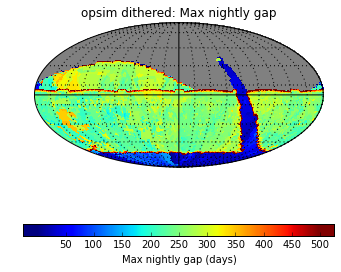

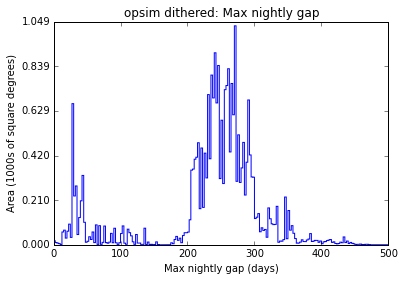

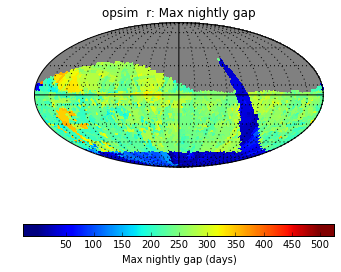

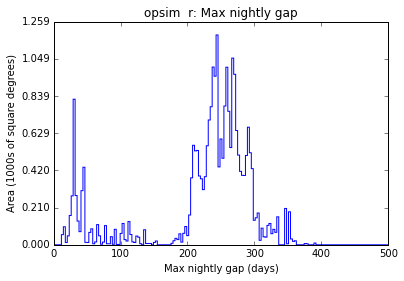

In [9]:
slicer=slicers.HealpixSlicer()
metric3 = metrics.InterNightGapsMetric(reduceFunc=np.max, metricName='Max nightly gap')
plotDict3 = {'cmap':'jet', 'colorMin':0,'colorMax':500, 'xMin':0,'xMax':500}
bundleList = []
bundleList.append(metricBundles.MetricBundle(metric3,slicer,sql,plotDict=plotDict3, plotFuncs=plotList))

slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
bundleList.append(metricBundles.MetricBundle(metric3,slicer,sql, metadata='dithered',plotDict=plotDict3, plotFuncs=plotList))

bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)